<a href="https://colab.research.google.com/github/Mefistofel82/Data-Analysis/blob/main/Uber_Data_analysis/Uber_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
uber_data = pd.read_csv('uber-raw-data-jul14.csv')

In [ ]:
uber_data.head()

,Date/Time,Lat,Lon,Base
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512


In [ ]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796121 entries, 0 to 796120
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  796121 non-null  object 
 1   Lat        796121 non-null  float64
 2   Lon        796121 non-null  float64
 3   Base       796121 non-null  object 
dtypes: float64(2), object(2)
memory usage: 24.3+ MB


In [ ]:
# Missing values checking

def num_missing(x):
    return sum(x.isnull())
print('Number of missing /null values per column')
print(uber_data.apply(num_missing, axis=0))

Number of missing /null values per column
Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64


In [ ]:
uber_data.isna().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [ ]:
uber_data.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')

In [ ]:
uber_data.head()

,Date/Time,Lat,Lon,Base
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512


In [ ]:
# Extracting additional information

uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'], format= '%m/%d/%Y %H:%M:%S')
uber_data['DayofWeekNum'] = uber_data['Date/Time'].dt.dayofweek
uber_data['DayofWeek'] = uber_data['Date/Time'].dt.day_name()
uber_data['DayNum'] = uber_data['Date/Time'].dt.day
uber_data['HourOfDay'] = uber_data['Date/Time'].dt.hour

In [ ]:
uber_data.head()

,Date/Time,Lat,Lon,Base,DayofWeekNum,DayofWeek,DayNum,HourOfDay
0,2014-07-01 00:03:00,40.7586,-73.9706,B02512,1,Tuesday,1,0
1,2014-07-01 00:05:00,40.7605,-73.9994,B02512,1,Tuesday,1,0
2,2014-07-01 00:06:00,40.7320,-73.9999,B02512,1,Tuesday,1,0
3,2014-07-01 00:09:00,40.7635,-73.9793,B02512,1,Tuesday,1,0
4,2014-07-01 00:20:00,40.7204,-74.0047,B02512,1,Tuesday,1,0


In [ ]:
uber_data.shape

(796121, 8)

In [ ]:
# Unique base codes

uber_data.Base.unique()

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

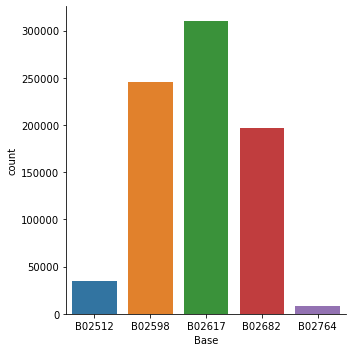

In [ ]:
# Total rides based on the base

sns.catplot(x='Base', data=uber_data, kind='count')

In [ ]:
uber_week_data = uber_data.pivot_table(index=['DayofWeekNum', 'DayofWeek'], values = 'Base', aggfunc='count')
uber_week_data

,,Base
DayofWeekNum,DayofWeek,
0,Monday,93189
1,Tuesday,137454
2,Wednesday,147717
3,Thursday,148439
4,Friday,102735
5,Saturday,90260
6,Sunday,76327


<AxesSubplot:xlabel='DayofWeekNum,DayofWeek'>

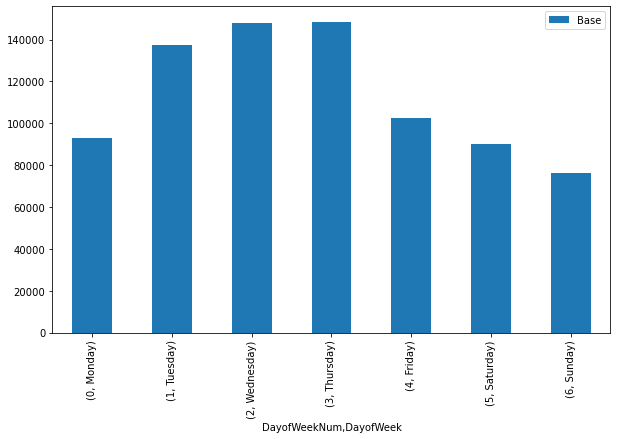

In [ ]:
# Visualizing the pivot table

uber_week_data.plot(kind='bar', figsize=(10,6))

<AxesSubplot:title={'center':'Hourly Journeys'}, xlabel='HourOfDay'>

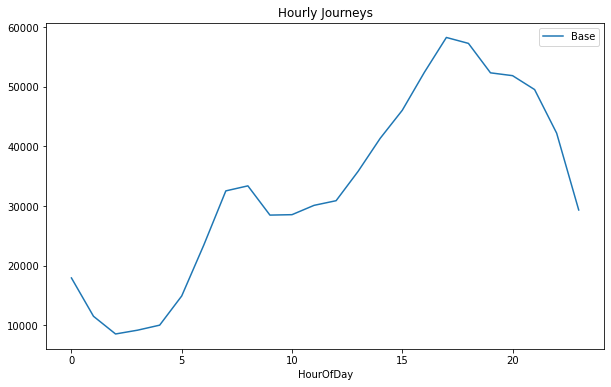

In [ ]:
uber_hourly_data = uber_data.pivot_table(index=['HourOfDay'], values = 'Base', aggfunc='count')
uber_hourly_data.plot(kind='line', figsize=(10,6), title="Hourly Journeys")

<AxesSubplot:title={'center':'Journeys by DayNum'}, xlabel='DayNum'>

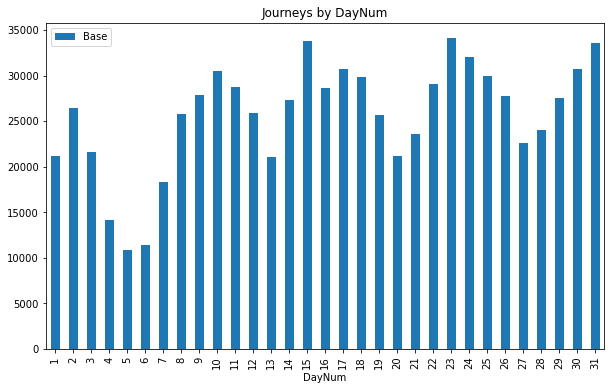

In [ ]:
uber_hourly_data = uber_data.pivot_table(index=['DayNum'], values = 'Base', aggfunc='count')
uber_hourly_data.plot(kind='bar', figsize=(10,6), title="Journeys by DayNum")

In [ ]:
def count_rows(rows):
    return len(rows)

by_date = uber_data.groupby('DayNum').apply(count_rows)
by_date

DayNum
1     21228
2     26480
3     21597
4     14148
5     10890
6     11443
7     18280
8     25763
9     27817
10    30541
11    28752
12    25936
13    21082
14    27350
15    33845
16    28607
17    30710
18    29860
19    25726
20    21212
21    23578
22    29029
23    34073
24    32050
25    29975
26    27708
27    22590
28    23981
29    27589
30    30740
31    33541
dtype: int64

(array([11527.,  8562.,  9199., 10040., 14932., 23456., 32545., 33387.,
        28486., 28558., 30120., 30900., 35832., 41357., 46053., 52403.,
        58260., 57268., 52332., 51859., 49528., 42218., 29346.,     0.]),
 array([ 0.5       ,  1.47916667,  2.45833333,  3.4375    ,  4.41666667,
         5.39583333,  6.375     ,  7.35416667,  8.33333333,  9.3125    ,
        10.29166667, 11.27083333, 12.25      , 13.22916667, 14.20833333,
        15.1875    , 16.16666667, 17.14583333, 18.125     , 19.10416667,
        20.08333333, 21.0625    , 22.04166667, 23.02083333, 24.        ]),
 <BarContainer object of 24 artists>)

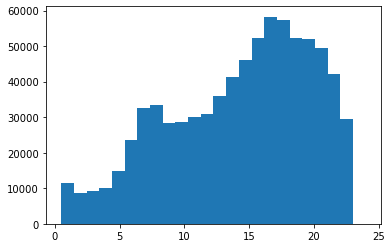

In [ ]:
# Analyze the hours

plt.hist(uber_data.HourOfDay, bins=24, range=(.5, 24))

In [ ]:
uber_data.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base', 'DayofWeekNum', 'DayofWeek',
       'DayNum', 'HourOfDay'],
      dtype='object')

In [ ]:
by_hour_weekday = uber_data.groupby('HourOfDay DayofWeekNum'.split()).apply(count_rows).unstack()
by_hour_weekday

DayofWeekNum,0,1,2,3,4,5,6
HourOfDay,,,,,,,
0,1260,1509,1773,2150,2460,4441,4360
1,613,779,966,1157,1541,3153,3318
2,439,556,780,855,1059,2320,2553
3,1019,935,1120,1283,1230,1704,1908
4,1615,1483,1630,1884,1359,1087,982
5,2461,2730,2799,2931,1989,1097,925
6,3644,4811,5017,4796,2947,1214,1027
7,5066,6750,7129,6709,4032,1594,1265
8,4797,6662,7125,6683,4152,2101,1867


<AxesSubplot:xlabel='DayofWeekNum', ylabel='HourOfDay'>

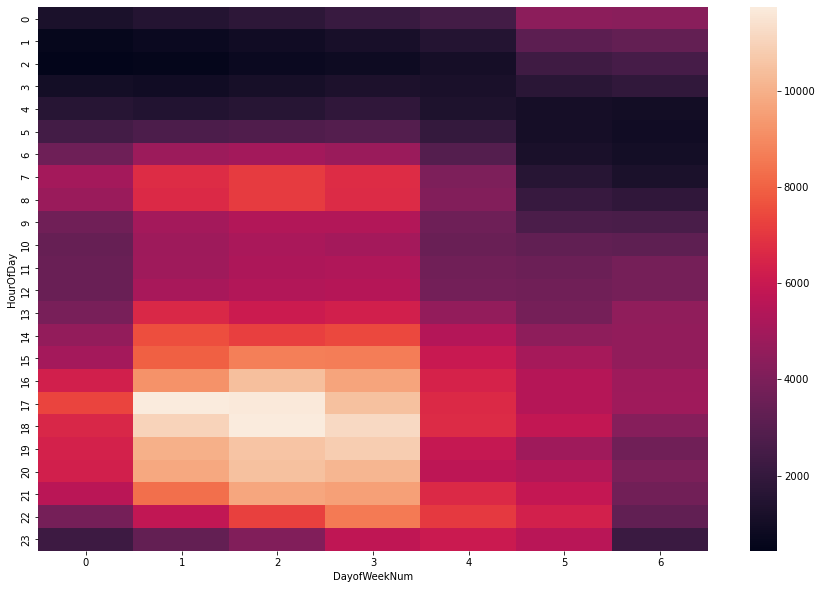

In [ ]:
# Heat map the brightest spot shows the day/hour with the highest frequency

plt.figure(figsize=(15, 10))
sns.heatmap(by_hour_weekday)